# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [1]:
import numpy as np


def triangle_area_heron(a, b, c):
    # Add code here
    s = (a+b+c)/2
    area = np.sqrt(s*(s-a)*(s-b)*(s-c))
    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [2]:
import numpy as np


def triangle_area_kahan(a, b, c):
    # Add code here
    a, b, c = sorted([a, b, c], reverse=True)
    term1 = (a + (b + c)) 
    term2 = (c - (a - b)) 
    term3 = (c + (a - b)) 
    term4 = (a + (b - c)) 
    area = np.sqrt(term1 * term2 * term3 * term4) / 4
    return area

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

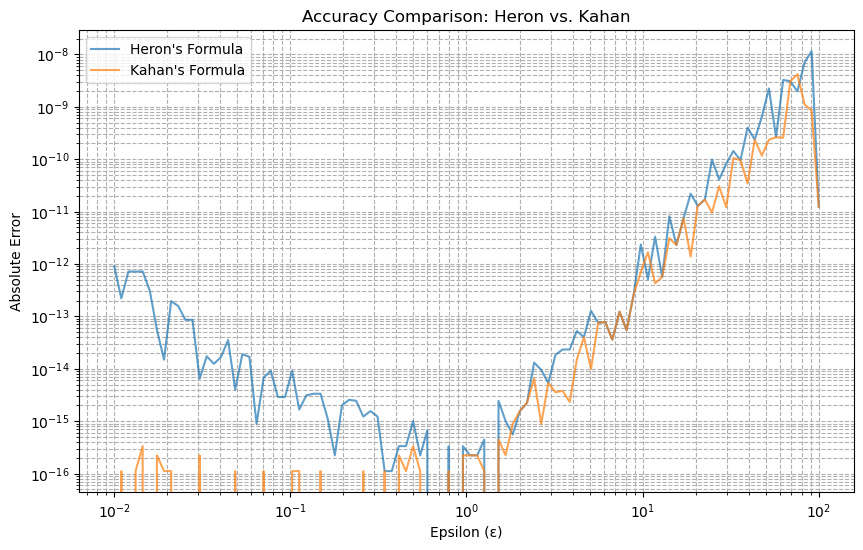

In [3]:
# Add code here
import matplotlib.pyplot as plt
import numpy as np



# Generate epsilon values
eps = np.logspace(-2, 2, 100)  # From 0.01 to 100

# Preallocate error arrays
heron_errors = np.zeros_like(eps)
kahan_errors = np.zeros_like(eps)
true_area = 1.0

# Vectorize calculations (loop over each epsilon)
for i in range(len(eps)):
    e = eps[i]
    a = 2 * e
    b = np.sqrt(1 + e**4) / e
    c = b
    # Compute areas for current epsilon
    heron_area = triangle_area_heron(a, b, c)
    kahan_area = triangle_area_kahan(a, b, c)
    # Store errors
    heron_errors[i] = np.abs(heron_area - true_area)
    kahan_errors[i] = np.abs(kahan_area - true_area)

# Plot results
plt.figure(figsize=(10, 6))
plt.loglog(eps, heron_errors, label="Heron's Formula", alpha=0.7)
plt.loglog(eps, kahan_errors, label="Kahan's Formula", alpha=0.7)
plt.xlabel("Epsilon (ε)")
plt.ylabel("Absolute Error")
plt.title("Accuracy Comparison: Heron vs. Kahan")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Discussion
From derivation we are told that the true area is exactly 1.0 for any epsilon. From the graph we can tell that the area given by using Heron's formula shows a higher absolute error for epsilon < 1*10^-1 and epsilon >10 whereas the area given by using Kahan's formula despite also spiking after epsilon > 10, has much less absolute error for small values of epsilon.
The reason for this error are most likely due to accumuated floating-point precision errors.


## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [5]:
import numpy as np


def sequence_element(n):
    # Add code here
    i=0
    x=np.array([1,1])
    A = np.array([[0,1],[1,1]])
    while i<n:
        x = A@x
        i+=1

    return x
sequence_element(2)

**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

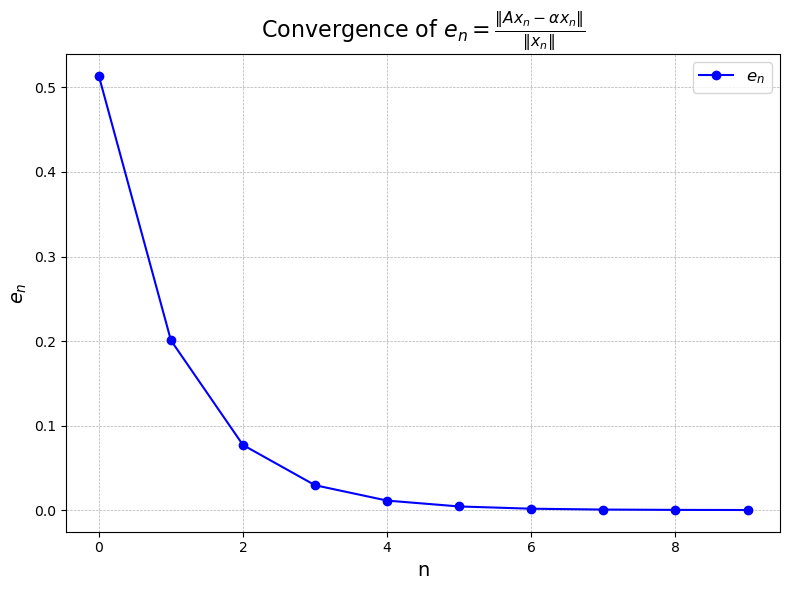

In [9]:
# Add code here
x=np.array([1,1])
A = np.array([[0,1],[1,1]])
eigenvalues = np.linalg.eigvals(A)
alpha = max(eigenvalues, key=abs)

def compute_e_n(x, A, alpha):
    Ax = A @ x
    residual = np.linalg.norm(Ax - alpha * x)  # Numerator
    norm_x = np.linalg.norm(x)                # Denominator
    return residual / norm_x

n_values = []
e_n_values = []
for n in range(10):  # compute for n = 0 to 9
    e_n = compute_e_n(x, A, alpha)
    n_values.append(n)
    e_n_values.append(e_n)
    x = A @ x  # Update x for next iteration

plt.figure(figsize=(8, 6))
plt.plot(n_values, e_n_values, marker='o', label=r'$e_n$', color='blue')
plt.xlabel('n', fontsize=14)
plt.ylabel(r'$e_n$', fontsize=14)
plt.title(r'Convergence of $e_n = \frac{\| A x_n - \alpha x_n \|}{\| x_n \|}$', fontsize=16)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Discussion

From the graph we can see that as n increases, e_n converges to 0 exponentially. This happens as when we repeatedly multiply x by A, because the eigenvalue control the growth of vectors under repreated matrix multiplication, Ax tends to alpha*x as more multiplications takes place.

## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [8]:
import numpy as np
from scipy.integrate import quad


def interpolatory_quadrature_weights(x):
    """
    Compute the interpolatory quadrature weights for given quadrature points.

    Parameters:
        x (np.ndarray): Shape `(N + 1,)` array of quadrature points.

    Returns:
        w (np.ndarray): Shape `(N + 1,)` array of corresponding quadrature weights.
    """
    N = len(x) - 1  # Degree of the interpolating polynomial
    w = np.zeros_like(x)  # Initialize weights

    for i in range(N + 1):
        # Compute the Lagrange basis polynomial L_i(x)
        def L_i(t):
            product = 1.0
            for j in range(N + 1):
                if i != j:
                    product *= (t - x[j]) / (x[i] - x[j])
            return product

        # Integrate L_i(x) over [-1, 1] 
        w[i], _ = quad(L_i, -1, 1)

    return w

# Add test code here
x_midpoint = np.array([0.0])  # Single point at the midpoint
w_midpoint = interpolatory_quadrature_weights(x_midpoint)
print("Midpoint Rule Weights:", w_midpoint)
x_trapezoidal = np.array([-1.0, 1.0])  # Two points at the endpoints
w_trapezoidal = interpolatory_quadrature_weights(x_trapezoidal)
print("Trapezoidal Rule Weights:", w_trapezoidal)
x_simpson = np.array([-1.0, 0.0, 1.0])  # Three points: endpoints and midpoint
w_simpson = interpolatory_quadrature_weights(x_simpson)
print("Simpson's Rule Weights:", w_simpson)

Midpoint Rule Weights: [2.]
Trapezoidal Rule Weights: [1. 1.]
Simpson's Rule Weights: [0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

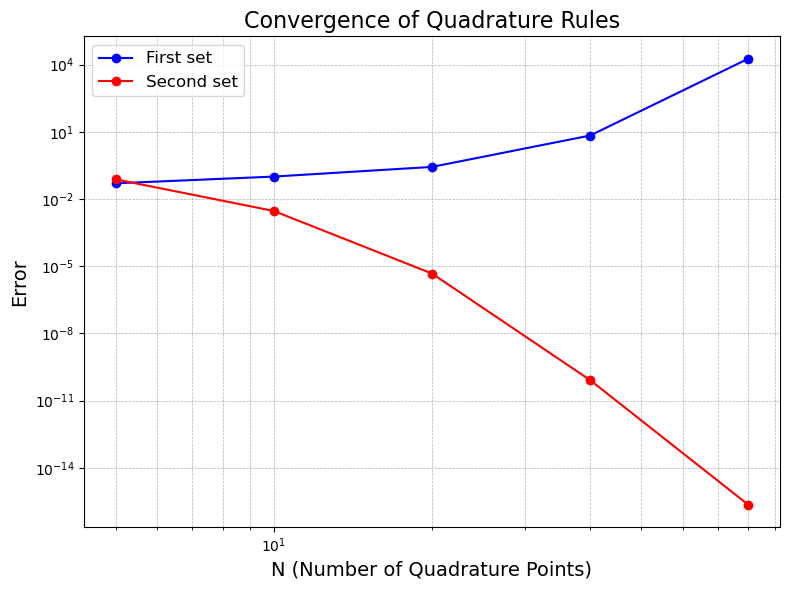

In [15]:
# Add code here
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


# Function to approximate the integral
def approximate_integral(x, f):
    w = interpolatory_quadrature_weights(x)
    return np.sum(w * f(x))

# Define the function f(x)
f = lambda x: 1 / (1 + (3 * x)**2)

# True value of the integral
true_value = (2 / 3) * np.arctan(3)

# Test for different values of N
N_values = [5, 10, 20, 40, 80]
errors_1 = []
errors_2 = []

for N in N_values:
    x_1 = np.linspace(-1, 1, N + 1)
    approx_1 = approximate_integral(x_1, f)
    error_1 = abs(approx_1 - true_value)
    errors_1.append(error_1)
    
    x_2 = -np.cos(np.pi * np.arange(N + 1) / N)
    approx_2= approximate_integral(x_2, f)
    error_2 = abs(approx_2 - true_value)
    errors_2.append(error_2)

# Print results
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors_1, marker='o', label='First set', color='blue')
plt.loglog(N_values, errors_2, marker='o', label='Second set', color='red')
plt.xlabel('N (Number of Quadrature Points)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Convergence of Quadrature Rules', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Discussion

From the plot we can see that although bothsets of quadrature points give a similar error for lower number of N, as we increase N the error in the second set of quadrature points are dropping exponentially whereas the error in the first set of quadrature points the error is increasing as we increase N